<a href="https://colab.research.google.com/github/taylorp-j/NGG6050/blob/main/9_25_24_Parametric_Correlation_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, norm, t
from statsmodels.stats.power import NormalIndPower

In [4]:
#Data Table
data = {
    "Wing Length": [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4],
    "Tail Length": [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]
}

df = pd.DataFrame(data)
print(df)

    Wing Length  Tail Length
0          10.4          7.4
1          10.8          7.6
2          11.1          7.9
3          10.2          7.2
4          10.3          7.4
5          10.2          7.1
6          10.7          7.4
7          10.5          7.2
8          10.8          7.8
9          11.2          7.7
10         10.6          7.8
11         11.4          8.3


1. ** Plot X vs Y. Do they look related?**  

  As X increases, Y also seems to increase

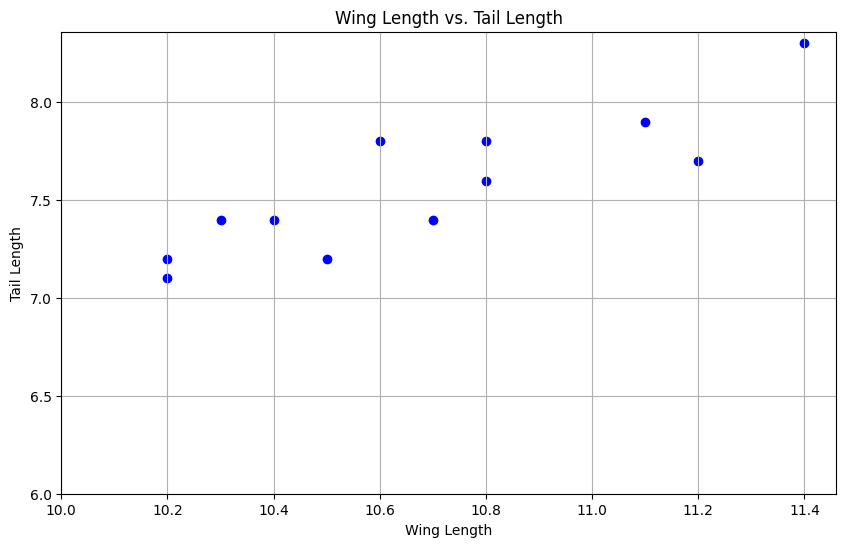

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Wing Length"], df["Tail Length"], color='blue', marker='o')

plt.title("Wing Length vs. Tail Length")
plt.xlabel("Wing Length")
plt.ylabel("Tail Length")
plt.xlim(left=10)
plt.ylim(bottom=6)
plt.grid()

# Show the plot
plt.show()

2. **Calculate r(x,y) and r(y,x) first using the equations above and then using either the Python numpy funciton corrcoef or Matlab's built-in corrcoef. Did you get the same answers?**

  Yes, I got the same answers

In [25]:
#Using Equations

#Data
x = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
y = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Function to calculate Pearson's correlation coefficient
def pearson_correlation(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(x**2)
    sum_y_squared = np.sum(y**2)
    sum_xy = np.sum(x * y)

    r = (n * sum_xy - sum_x * sum_y) / np.sqrt((n * sum_x_squared - sum_x**2) * (n * sum_y_squared - sum_y**2))
    return r

# Calculate r_x,y and r_y,x
r_xy = pearson_correlation(x, y)
r_yx = pearson_correlation(y, x)

print("r_x,y:", r_xy)
print("r_y,x:", r_yx)

r_x,y: 0.8703545613057361
r_y,x: 0.8703545613057361


In [24]:
#Using Python numpy function

# Calculate the correlation coefficient matrix
r_matrix = np.corrcoef(x, y)

# Extract the Pearson correlation coefficient
r_xy = r_matrix[0, 1]
r_yx = r_matrix[1, 0]

print("r_x,y:", r_xy)
print("r_y,x:", r_yx)

r_x,y: 0.8703545613058227
r_y,x: 0.8703545613058227


3. What is the standard error of r(x,y)? The 95% confidence intervals computed from the standard error?

In [31]:
# Calculate the standard error of the Pearson correlation coefficient
SE_r = np.sqrt((1 - r_xy ** 2) / (n - 2))

print("Standard error of the correlation coefficient:", SE_r)

#Calculate 95% confidence intervals
# Fisher's z-transformation
z = 0.5 * np.log((1 + r_xy) / (1 - r_xy))
print("Fisher's z-transformation (z):", z)

#Compute standard deviation of z
SD_z = np.sqrt(1 / (n - 3))

# z-criterion for 95% confidence level
z_critical = norm.ppf(0.975)  # For two-tailed test

# Calculate confidence interval in z-space
CI_lower = z - z_critical * SD_z
CI_upper = z + z_critical * SD_z

print("Z-criterion for 95% confidence level:", z_critical)
print("95% Confidence interval in z-space: [{:.4f}, {:.4f}]".format(CI_lower, CI_upper))

Standard error of the correlation coefficient: 0.15571863652572215
Fisher's z-transformation (z): 1.334539983586777
Z-criterion for 95% confidence level: 1.959963984540054
95% Confidence interval in z-space: [0.6812, 1.9879]


4. **Should the value of r(x,y) be considered significant at the p<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for H0 : r(x,y) = 0?**



In [35]:
# Compute the t-statistic
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)

# Determine degrees of freedom
df = n - 2

# Calculate the two-tailed p-value
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))

print("t-statistic:", t_stat)
print("Degrees of freedom (df):", df)
print("p-value:", p_value)

# Check significance
if p_value < 0.05:
    print("Reject H0: r_x,y is significant at the p < 0.05 level.")
else:
    print("Fail to reject H0: r_x,y is not significant at the p < 0.05 level.")

t-statistic: 5.589276792582035
Degrees of freedom (df): 10
p-value: 0.00023110594312125698
Reject H0: r_x,y is significant at the p < 0.05 level.


5. **Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate H0: r=0.75.**

This is not the same correlation value, but r is still significant at the p < 0.05 level.

In [36]:
#Yale's correlation value
r_yale = 0.75

#Compute the t-statistic with Yale's correlation value
t_stat_yale = r_yale * np.sqrt(n - 2) / np.sqrt(1 - r_yale**2)

# Calculate the two-tailed p-value
p_value_yale = 2 * (1 - t.cdf(np.abs(t_stat_yale), df))

print("t-statistic:", t_stat_yale)
print("p-value:", p_value_yale)

# Check significance
if p_value_yale < 0.05:
    print("Reject H0: r_yale is significant at the p < 0.05 level.")
else:
    print("Fail to reject H0: r_yale is not significant at the p < 0.05 level.")

t-statistic: 3.585685828003181
p-value: 0.004964560270309448
Reject H0: r_yale is significant at the p < 0.05 level.


6. Finally, calculate the statistical power and sample size needed to reject H0 : r = 0 when r > or = 0.5.

In [43]:
# Parameters
r_effect_size = 0.5
alpha = 0.05  # Significance level
power_target = 0.80

# Create an instance of NormalIndPower
power_analysis = NormalIndPower()

# Calculate required sample size
required_sample_size = power_analysis.solve_power(
    effect_size=r_effect_size,
    alpha=alpha,
    power=power_target,
    alternative='two-sided'
)

# Output the required sample size
print("Required sample size to achieve power of 0.80:", int(np.ceil(required_sample_size)))
print("Statistical power for detecting r ≥ 0.5 with sample size of", n, "is:", power)

Required sample size to achieve power of 0.80: 63
Statistical power for detecting r ≥ 0.5 with sample size of 12 is: 0.8
